# Heart Disease Prediction 

## Preface 
Heart disease is one of the most common and serious health issues in today's world. Factors such as smoking, gender, age, blood pressure, cholesterol levels, and a family history of heart disease play a significant role in its development. This project aims to analyze these risk factors and utilize machine learning techniques to develop a predictive model for heart disease. By doing so, it seeks to contribute to early diagnosis and preventive healthcare measures.

## Dataset Feature Explanations

* **Age** : The individual's age.

* **Gender** : The individual's gender (Male or Female).

* **Blood Pressure** : The individual's blood pressure (systolic).

* **Cholesterol Level**: The individual's total cholesterol level.

* **Exercise Habits** : The individual's exercise habits (Low, Medium, High).

* **Smoking** : Whether the individual smokes or not (Yes or No).

* **Family Heart Disease**: Whether there is a family history of heart disease (Yes or No).

* **Diabetes** : Whether the individual has diabetes (Yes or No).

* **BMI** : The individual's body mass index.

* **High Blood Pressure** : Whether the individual has high blood pressure (Yes or No).

* **Low HDL Cholesterol** : Whether the individual has low HDL cholesterol (Yes or No).

* **High LDL Cholesterol** : Whether the individual has high LDL cholesterol (Yes or No).

* **Alcohol Consumption** : The individual's alcohol consumption level (None, Low, Medium, High).

* **Stress Level** : The individual's stress level (Low, Medium, High).

* **Sleep Hours** : The number of hours the individual sleeps.

* **Sugar Consumption** : The individual's sugar consumption level (Low, Medium, High).

* **Triglyceride Level** : The individual's triglyceride level.

* **Fasting Blood Sugar** : The individual's fasting blood sugar level.

* **CRP Level** : The C-reactive protein level (a marker of inflammation).

* **Homocysteine Level** : The individual's homocysteine level (an amino acid that affects blood vessel health).

* **Heart Disease Status** : The individual's heart disease status (Yes or No).

## Analyze Content

1. [Dataset Feature Explanations](#Dataset-Feature-Explanations)
2. [Python Libraries](#Python-Libraries)
3. [Data Importing and First Overview](#Data-Importing-and-First-Overview)
   - [The differance between classes](#The-differance-between-classes)
4. [Outlier Dedection and Missing Data](#Outlier-Dedection-and-Missing-Data)

5. [Exploratory Data Analysis](#Exploratory-Data-Analysis)  
   - [The Analysis of Categorical Variables](#The-Analysis-of-Categorical-Variables)  
     - [Which Categorical Variables are Imbalance?](#Which-Categorical-Variables-are-Imbalance-?)  
     - [Does smoking affect the risk of heart disease?](#Does-smoking-affect-the-risk-of-heart-disease?)  
     - [Does exercise level influence heart disease?](#Does-exercise-level-influence-heart-disease?)  
     - [Are individuals with a family history of heart disease at higher risk?](#Are-individuals-with-a-family-history-of-heart-disease-at-higher-risk?)  
     - [Are individuals with high stress levels more prone to heart disease?](#Are-individuals-with-high-stress-levels-more-prone-to-heart-disease?)  
     - [How do stress levels and smoking habits together influence heart disease risk?](#How-do-stress-levels-and-smoking-habits-together-influence-heart-disease-risk?)  

   - [The Analysis of Numerical Variables](#The-Analysis-of-Numerical-Variables)  
     - [Do individuals with and without heart disease have different average ages?](#Do-individuals-with-and-without-heart-disease-have-different-average-ages?)  
     - [Does blood pressure affect heart disease?](#Does-blood-pressure-affect-heart-disease?)  
     - [What is the relationship between cholesterol level and heart disease?](#What-is-the-relationship-between-cholesterol-level-and-heart-disease?)  
     - [Does a higher BMI increase the risk of heart disease?](#Does-a-higher-BMI-increase-the-risk-of-heart-disease?)  
     - [Is there a relationship between triglyceride levels and the risk of heart disease?](#Is-there-a-relationship-between-triglyceride-levels-and-the-risk-of-heart-disease?)  
     - [Are individuals with higher fasting blood sugar levels at greater risk of heart disease?](#Are-individuals-with-higher-fasting-blood-sugar-levels-at-greater-risk-of-heart-disease?)  
     - [Are individuals with higher CRP levels more prone to heart disease?](#Are-individuals-with-higher-CRP-levels-more-prone-to-heart-disease?)  
     - [Does homocysteine level affect heart disease?](#Does-homocysteine-level-affect-heart-disease?)
     - [Does age affect heart disease?](#Does-age-affect-heart-disease?)
6. [Correlation Analysis](#Correlation-Analysis)

## Python Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns # Data visualization 
import matplotlib.pyplot as plt # Data visualization 
import scipy.stats as stats

from warnings import filterwarnings
filterwarnings('ignore')

## Data Importing and First Overview

In [2]:
heart_diases = pd.read_csv("../data/raw/heart_disease.csv")
df = heart_diases.copy()

In [3]:
df.head(5)

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High       Medium    7.633228   
1                   No              Medium         High    8.744034   
2                  Yes                 Low          Low    4.440440   
3                  Yes                 Low         High    5.249405   
4                   No                 Low         High    7.030971   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0             Medium              342.0                  NaN  12.969246   
1             Medium              133.0                157.0   9.355389   
2                Low              393.0                 92.0  12.709873   
3               High              293.0                 94.0  12.509046   
4               High              263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  
0           12.387250                    No  
1           19.298875                    No  
2           11.230926                    No  
3            5.961958                    No  
4            8.153887                    No  

[5 rows x 21 columns]

In [4]:
df.head(5)

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High       Medium    7.633228   
1                   No              Medium         High    8.744034   
2                  Yes                 Low          Low    4.440440   
3                  Yes                 Low         High    5.249405   
4                   No                 Low         High    7.030971   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0             Medium              342.0                  NaN  12.969246   
1             Medium              133.0                157.0   9.355389   
2                Low              393.0                 92.0  12.709873   
3               High              293.0                 94.0  12.509046   
4               High              263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  
0           12.387250                    No  
1           19.298875                    No  
2           11.230926                    No  
3            5.961958                    No  
4            8.153887                    No  

[5 rows x 21 columns]

In [5]:
df.dtypes

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object

In [6]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [7]:
df.iloc[:5,10:11] # invisible column

Low HDL Cholesterol
0                 Yes
1                 Yes
2                 Yes
3                  No
4                  No

In [8]:
df.describe().T

count        mean        std         min         25%  \
Age                  9971.0   49.296259  18.193970   18.000000   34.000000   
Blood Pressure       9981.0  149.757740  17.572969  120.000000  134.000000   
Cholesterol Level    9970.0  225.425577  43.575809  150.000000  187.000000   
BMI                  9978.0   29.077269   6.307098   18.002837   23.658075   
Sleep Hours          9975.0    6.991329   1.753195    4.000605    5.449866   
Triglyceride Level   9974.0  250.734409  87.067226  100.000000  176.000000   
Fasting Blood Sugar  9978.0  120.142213  23.584011   80.000000   99.000000   
CRP Level            9974.0    7.472201   4.340248    0.003647    3.674126   
Homocysteine Level   9980.0   12.456271   4.323426    5.000236    8.723334   

                            50%         75%         max  
Age                   49.000000   65.000000   80.000000  
Blood Pressure       150.000000  165.000000  180.000000  
Cholesterol Level    226.000000  263.000000  300.000000  
BMI                   29.079492   34.520015   39.996954  
Sleep Hours            7.003252    8.531577    9.999952  
Triglyceride Level   250.000000  326.000000  400.000000  
Fasting Blood Sugar  120.000000  141.000000  160.000000  
CRP Level              7.472164   11.255592   14.997087  
Homocysteine Level    12.409395   16.140564   19.999037

In [9]:
df.shape # 10000 rows and 21 columns

(10000, 21)

### The differance between classes 

In [10]:
df["Gender"].value_counts()

Gender
Male      5003
Female    4978
Name: count, dtype: int64

In [11]:
df["Smoking"].value_counts()

Smoking
Yes    5123
No     4852
Name: count, dtype: int64

In [12]:
df["Family Heart Disease"].value_counts()

Family Heart Disease
No     5004
Yes    4975
Name: count, dtype: int64

In [13]:
df["Stress Level"].value_counts()

Stress Level
Medium    3387
Low       3320
High      3271
Name: count, dtype: int64

## Outlier Dedection and Missing Data

In [14]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [15]:
df.isnull().sum()/len(df) * 100

Age                      0.29
Gender                   0.19
Blood Pressure           0.19
Cholesterol Level        0.30
Exercise Habits          0.25
Smoking                  0.25
Family Heart Disease     0.21
Diabetes                 0.30
BMI                      0.22
High Blood Pressure      0.26
Low HDL Cholesterol      0.25
High LDL Cholesterol     0.26
Alcohol Consumption     25.86
Stress Level             0.22
Sleep Hours              0.25
Sugar Consumption        0.30
Triglyceride Level       0.26
Fasting Blood Sugar      0.22
CRP Level                0.26
Homocysteine Level       0.20
Heart Disease Status     0.00
dtype: float64

In [16]:
# Total Mising Data 
df.isnull().sum().sum()

3054

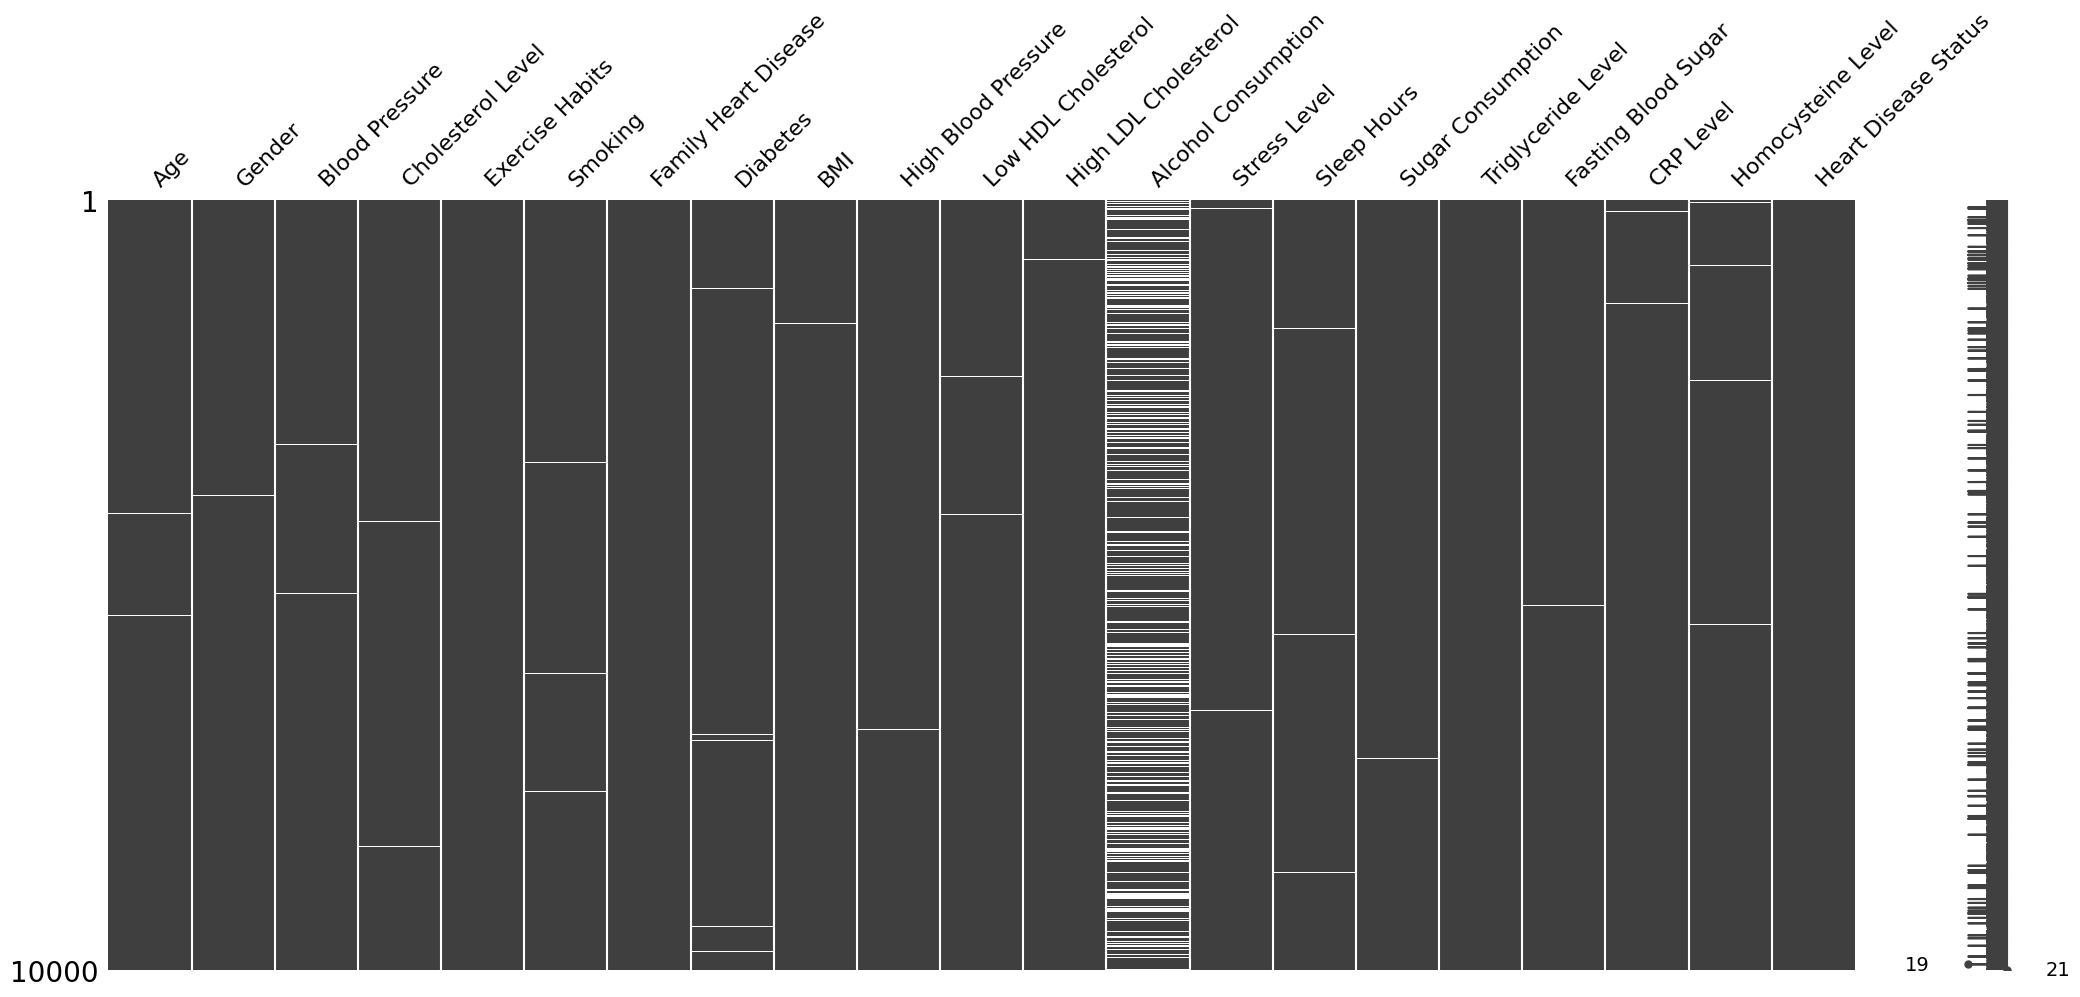

In [17]:
msno.matrix(df);

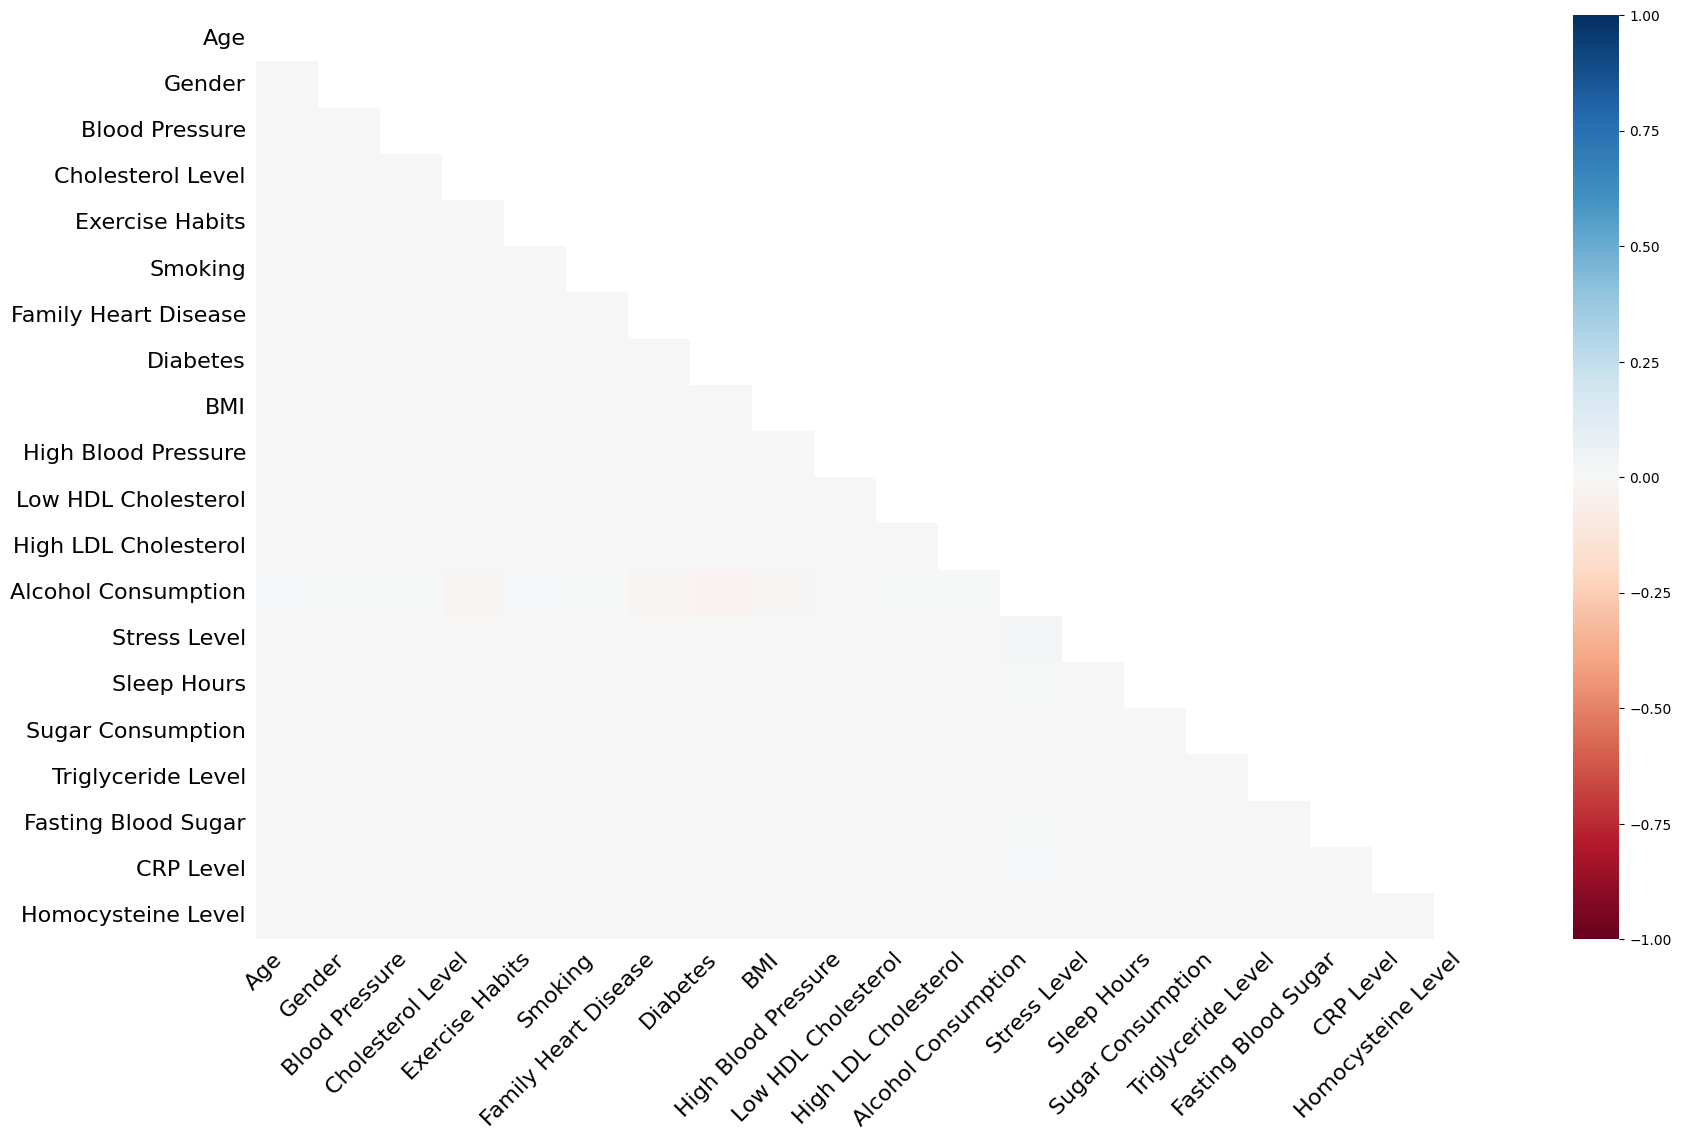

In [18]:
msno.heatmap(df);

* Missing it is obvserved that there is no relationship between the data

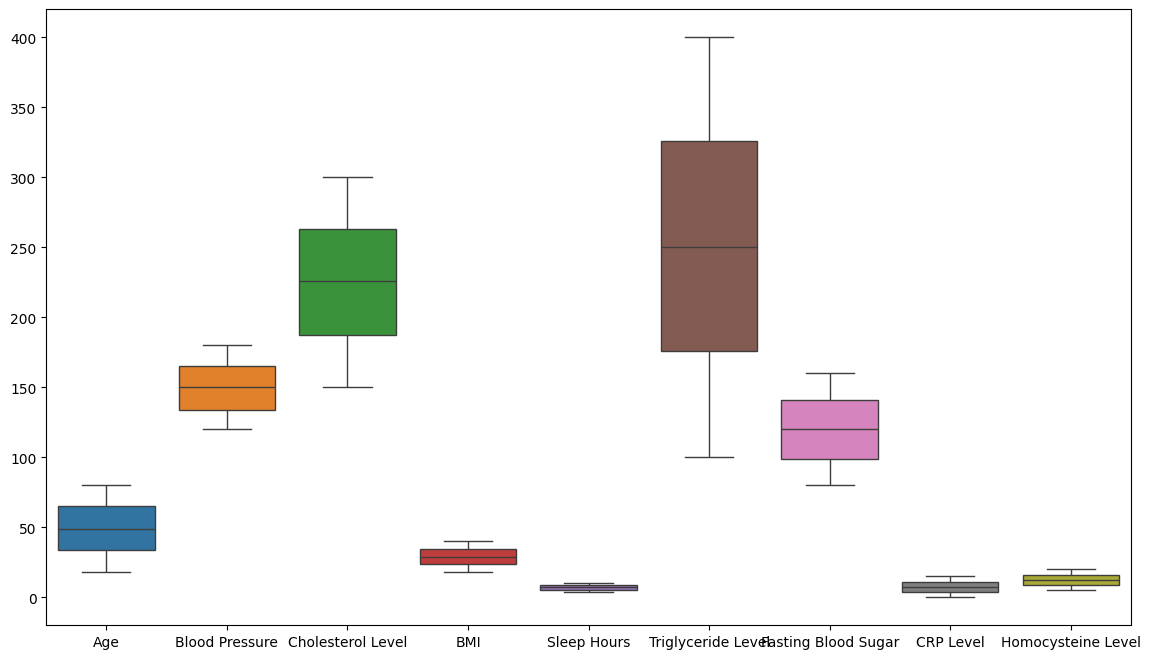

In [19]:
plt.figure(figsize=(14,8))
sns.boxplot(df)
plt.show()

* There are no outlier dedections  

## Exploratory Data Analysis

In [20]:
df.head()

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High       Medium    7.633228   
1                   No              Medium         High    8.744034   
2                  Yes                 Low          Low    4.440440   
3                  Yes                 Low         High    5.249405   
4                   No                 Low         High    7.030971   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0             Medium              342.0                  NaN  12.969246   
1             Medium              133.0                157.0   9.355389   
2                Low              393.0                 92.0  12.709873   
3               High              293.0                 94.0  12.509046   
4               High              263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  
0           12.387250                    No  
1           19.298875                    No  
2           11.230926                    No  
3            5.961958                    No  
4            8.153887                    No  

[5 rows x 21 columns]

### The Analysis of Categorical Variables 

#### Which Categorical Variables are Imbalance ? 

In [21]:
cat_df = df.select_dtypes(include = ["object"])
cat_df.nunique()

Gender                  2
Exercise Habits         3
Smoking                 2
Family Heart Disease    2
Diabetes                2
High Blood Pressure     2
Low HDL Cholesterol     2
High LDL Cholesterol    2
Alcohol Consumption     3
Stress Level            3
Sugar Consumption       3
Heart Disease Status    2
dtype: int64

In [22]:
for col in cat_df.columns:
    print(f"Column : {col}")
    print(cat_df[col].value_counts(),end = "\n\n")

Column : Gender
Gender
Male      5003
Female    4978
Name: count, dtype: int64

Column : Exercise Habits
Exercise Habits
High      3372
Medium    3332
Low       3271
Name: count, dtype: int64

Column : Smoking
Smoking
Yes    5123
No     4852
Name: count, dtype: int64

Column : Family Heart Disease
Family Heart Disease
No     5004
Yes    4975
Name: count, dtype: int64

Column : Diabetes
Diabetes
No     5018
Yes    4952
Name: count, dtype: int64

Column : High Blood Pressure
High Blood Pressure
Yes    5022
No     4952
Name: count, dtype: int64

Column : Low HDL Cholesterol
Low HDL Cholesterol
Yes    5000
No     4975
Name: count, dtype: int64

Column : High LDL Cholesterol
High LDL Cholesterol
No     5036
Yes    4938
Name: count, dtype: int64

Column : Alcohol Consumption
Alcohol Consumption
Medium    2500
Low       2488
High      2426
Name: count, dtype: int64

Column : Stress Level
Stress Level
Medium    3387
Low       3320
High      3271
Name: count, dtype: int64

Column : Sugar Consum

Data Set General Evaluation
* In our dataset distribution of indepented values balance however target value = "Heart Disease Status" is imbalance this rate is %20 - %80" <br>

Considerations for the Modeling Phase:
* Imbalanced datasets can cause the model to favor the majority class ("No"), making it more difficult to correctly predict the minority class ("Yes").
* To address this imbalance, the following techniques can be considered:
* SMOTE (Synthetic Minority Over-sampling Technique) to increase the minority class
* Class Weight adjustment to give more importance to the minority class
* Evaluation using F1-Score, Precision-Recall metrics instead of relying only on accuracy <br>


Conclusion:
The imbalance detected during the EDA phase should be carefully handled in the modeling stage. Appropriate balancing techniques should be used to avoid misleading results

#### Does smoking affect the risk of heart disease?

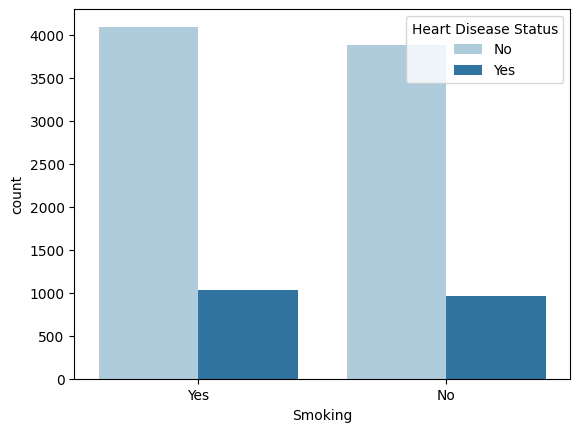

In [23]:
sns.countplot(data = df , x = "Smoking",hue = "Heart Disease Status",palette ="Paired")
plt.show()

In [24]:
df.groupby("Smoking")["Heart Disease Status"].value_counts(normalize=True)

Smoking  Heart Disease Status
No       No                      0.801113
         Yes                     0.198887
Yes      No                      0.799141
         Yes                     0.200859
Name: proportion, dtype: float64

In [25]:
smoking_heart_disease = df.groupby("Smoking")["Heart Disease Status"].value_counts(normalize=True)

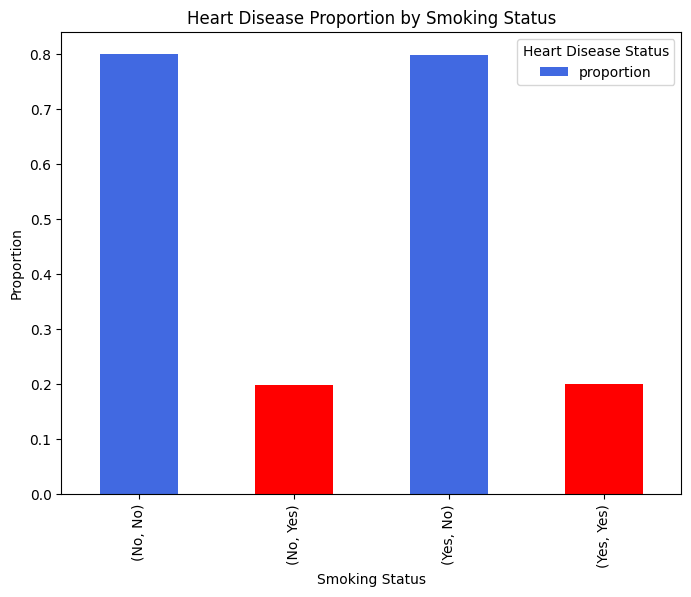

In [26]:
smoking_heart_disease.plot(kind = "bar",stacked=False, figsize=(8,6), color=["royalblue", "red"])
plt.title("Heart Disease Proportion by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Proportion")
plt.legend(title="Heart Disease Status")
plt.show()

In [27]:
smoking_heart_disease = df.groupby("Smoking")["Heart Disease Status"].value_counts(normalize=True).unstack()

smoking_heart_disease.plot(kind="bar", stacked=True, figsize=(8,6), color=["darkgreen","seagreen"])

plt.title("Stacked Heart Disease Proportion by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Proportion")
plt.legend(title="Heart Disease Status")
plt.show()


* The countplot shows that the proportion of heart disease among smokers and non-smokers is nearly the same.
* The grouped bar plot and stacked bar plot confirm that the difference between smokers and non-smokers in terms of heart disease is minimal.
* According to the normalized proportions, about 20% of both smokers and non-smokers have heart disease, while 80% do not.
* This suggests that smoking alone may not be a strong predictor of heart disease in this dataset.

####  Does exercise level influence heart disease?

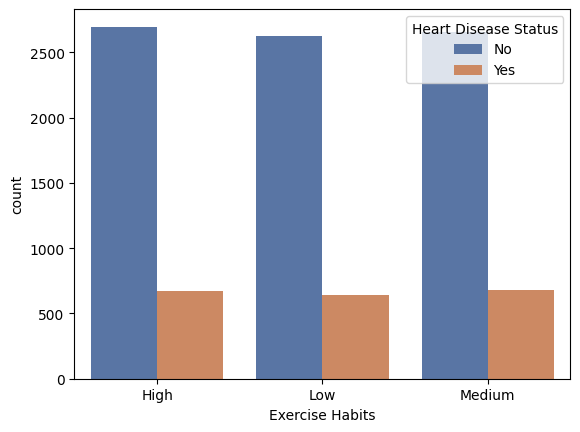

In [28]:
sns.countplot(data = df,x = "Exercise Habits",hue = "Heart Disease Status",palette = "deep")
plt.show()

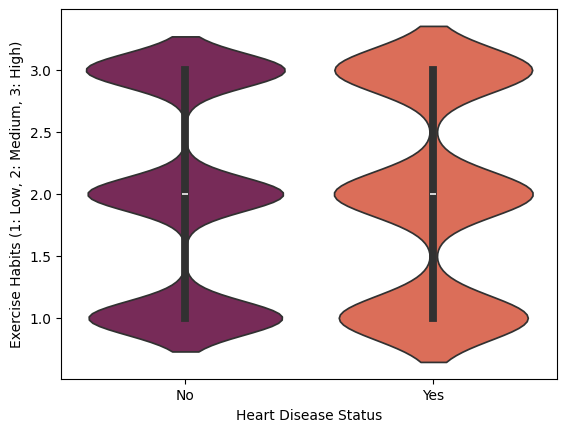

In [29]:
exercise_mapping = {"Low": 1, "Medium": 2, "High": 3}
df["Exercise Habits Numeric"] = df["Exercise Habits"].map(exercise_mapping)

sns.violinplot(data=df, x="Heart Disease Status", y="Exercise Habits Numeric",palette = "rocket")

plt.xticks([0, 1], ["No", "Yes"])  
plt.ylabel("Exercise Habits (1: Low, 2: Medium, 3: High)")
plt.show()


* The countplot shows that the proportion of heart disease cases is fairly similar across all exercise levels (High, Medium, and Low).
* There doesn’t seem to be a clear trend suggesting that individuals who exercise more have a significantly lower risk of heart disease.
* The proportion of heart disease cases remains almost constant across different exercise levels, indicating that exercise habits alone may not be a strong predictor of heart disease in this dataset.

#### Are individuals with a family history of heart disease at higher risk?

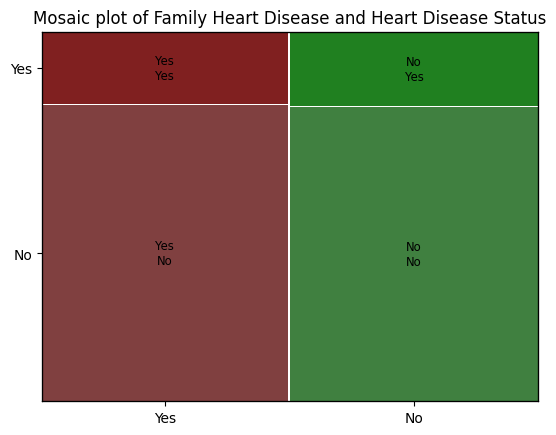

In [30]:
mosaic(data = df, index = ["Family Heart Disease","Heart Disease Status"])
plt.title("Mosaic plot of Family Heart Disease and Heart Disease Status")
plt.show()

* The mosaic plot shows that the proportion of heart disease cases among individuals with and without a family history of heart disease is almost equal.
* There is no significant difference in the proportion of heart disease between the two groups, suggesting that having a family history may not be a strong predictor of heart disease in this dataset.
* If a family history of heart disease were a major factor, we would expect a much larger proportion of "Yes" cases in the "Family History = Yes" category.

In [31]:
family_heart_disease_heatmap = pd.crosstab(df["Family Heart Disease"], df["Heart Disease Status"])
plt.figure(figsize=(6,4))
sns.heatmap(family_heart_disease_heatmap, annot=True, cmap="coolwarm", fmt="d")
plt.title("Heatmap of Family Heart Disease and Heart Disease Status")
plt.xlabel("Heart Disease Status")
plt.ylabel("Family Heart Disease")
plt.show()


In [32]:
chi2_table = pd.crosstab(df["Family Heart Disease"], df["Heart Disease Status"])
chi2_stat, p, dof, expected = stats.chi2_contingency(chi2_table)

plt.figure(figsize=(6,5))
sns.heatmap(expected, annot=True, cmap="PuRd", fmt=".2f")
plt.title("Chi-Square Expected Values Heatmap")
plt.xlabel("Heart Disease Status")
plt.ylabel("Family Heart Disease")
plt.show()

print(f"Chi-Square Test p-value: {p}")


Chi-Square Test p-value: 0.5116692335334628


* The first heatmap (observed values) shows the actual counts of heart disease cases for individuals with and without a family history of heart disease.
* The second heatmap (expected values from the Chi-Square test) shows that the expected counts are very close to the observed counts, indicating no significant deviation.
* Chi-Square test result: p-value = 0.511

Since p-value > 0.05, we fail to reject the null hypothesis, meaning there is no significant association between family history of heart disease and having heart disease in this dataset.
* Conclusion: Having a family history of heart disease does not seem to be a strong predictor of heart disease in this dataset.

#### Are individuals with high stress levels more prone to heart disease?

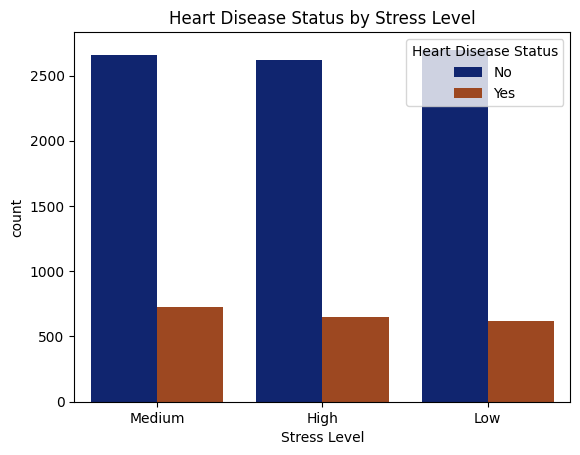

In [33]:
sns.countplot(data = df, x = "Stress Level",hue = "Heart Disease Status",palette = "dark")
plt.title("Heart Disease Status by Stress Level")
plt.show()

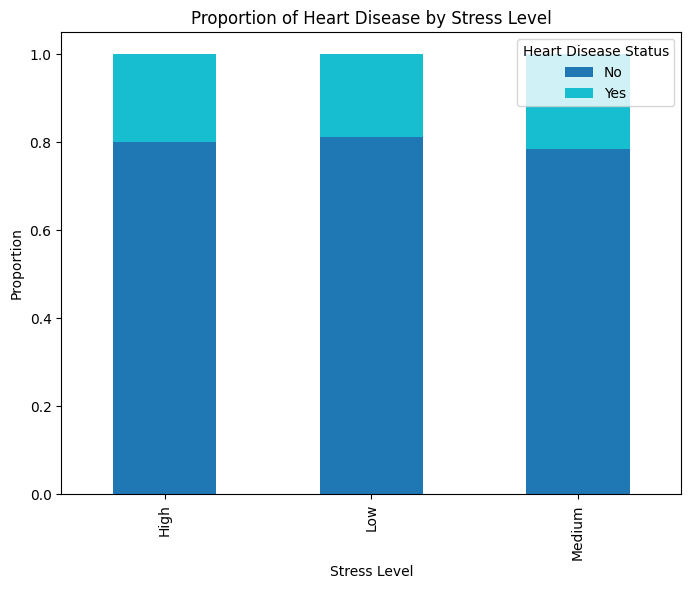

In [34]:
stress_heart_disease = pd.crosstab(df["Stress Level"], df["Heart Disease Status"], normalize="index")

stress_heart_disease.plot(kind="bar", stacked=True, figsize=(8,6), colormap="tab10")
plt.title("Proportion of Heart Disease by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Proportion")
plt.legend(title="Heart Disease Status")
plt.show()

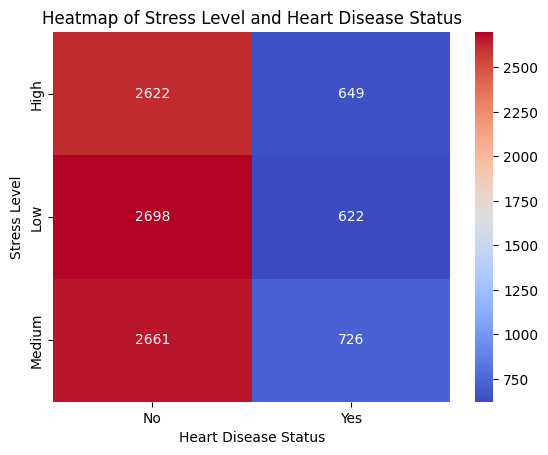

In [35]:
stress_level_heatmap = pd.crosstab(df["Stress Level"], df["Heart Disease Status"])
sns.heatmap(stress_level_heatmap, annot=True, cmap="coolwarm", fmt="d")
plt.title("Heatmap of Stress Level and Heart Disease Status")
plt.xlabel("Heart Disease Status")
plt.ylabel("Stress Level")
plt.show()

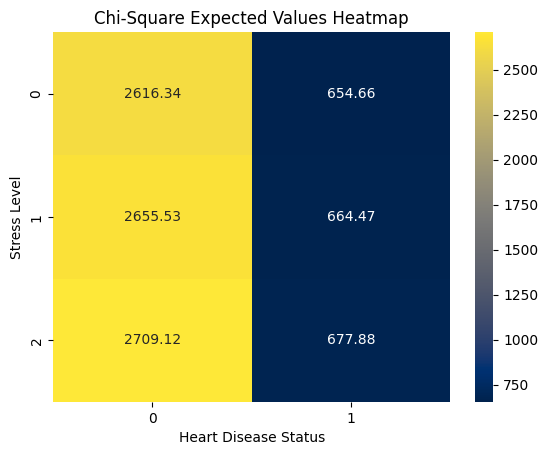

Chi-Square Test p-value: 0.021008453758264992


In [36]:
chi2_table = pd.crosstab(df["Stress Level"], df["Heart Disease Status"])
chi2_stat, p, dof, expected = stats.chi2_contingency(chi2_table)

sns.heatmap(expected, annot=True, cmap="cividis", fmt=".2f")
plt.title("Chi-Square Expected Values Heatmap")
plt.xlabel("Heart Disease Status")
plt.ylabel("Stress Level")
plt.show()

print(f"Chi-Square Test p-value: {p}")

##### **Key Observations**:
* A Chi-Square test was conducted to determine whether stress level and heart disease status are statistically related.
* The p-value was found to be less than 0.05, indicating a significant relationship between stress level and heart disease.<br>
##### **Graphical Insights**:
* The stacked bar plot shows that individuals with medium stress levels have a slightly higher proportion of heart disease compared to those with low or high stress levels.
* The heatmap of expected vs. actual values confirms that the observed distribution aligns with the statistical test results. <br>
##### **Conclusion** :
* Stress level is a significant factor in heart disease risk based on statistical tests and visualizations.
* Individuals with medium stress levels appear to be more prone to heart disease than those with high or low stress levels.


#### How do stress levels and smoking habits together influence heart disease risk?

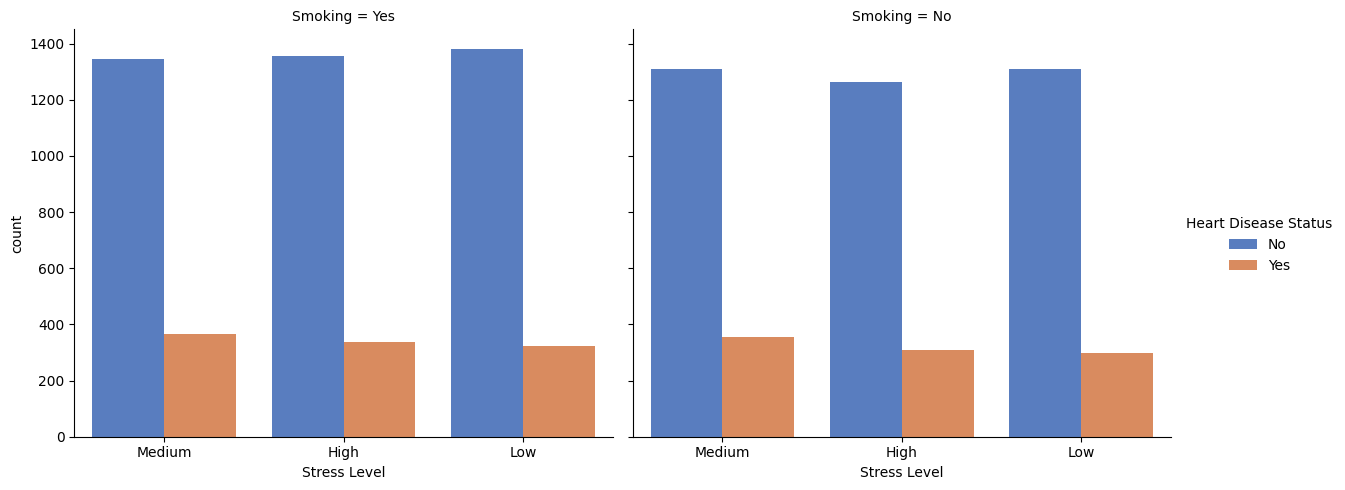

In [37]:
sns.catplot(data=df, x="Stress Level", hue="Heart Disease Status", 
            col="Smoking", kind="count", height=5, aspect=1.2,palette = "muted")

plt.show()


In [38]:
chi2_table = pd.crosstab(df["Stress Level"], df["Smoking"])
chi2_stat, p, dof, expected = stats.chi2_contingency(chi2_table)
print(f"Chi-Square Test p-value: {p}")

Chi-Square Test p-value: 0.6251935113789563


In [39]:
chi2_table = pd.crosstab(df["Stress Level"], df["Heart Disease Status"])
chi2_stat, p, dof, expected = stats.chi2_contingency(chi2_table)
print(f"Chi-Square Test p-value: {p}")

Chi-Square Test p-value: 0.021008453758264992


In [40]:
chi2_table = pd.crosstab(df["Smoking"], df["Heart Disease Status"])
chi2_stat, p, dof, expected = stats.chi2_contingency(chi2_table)
print(f"Chi-Square Test p-value: {p}")

Chi-Square Test p-value: 0.8250311387918522


**Key Findings**

1. Smoking does not have a statistically significant relationship with either heart disease or stress level.

* p-value (Smoking & Heart Disease): 0.825 (> 0.05)
* p-value (Smoking & Stress Level): 0.625 (> 0.05)
* This suggests that smoking alone does not directly influence heart disease risk in this dataset.

2. Stress level has a statistically significant relationship with heart disease.
* p-value (Stress Level & Heart Disease): 0.021 (< 0.05)
* This means that stress level is an important factor affecting heart disease risk.

3. Medium stress levels show a higher likelihood of heart disease compared to high and low stress levels.
* This is not a result of random variation but an actual statistically significant pattern.
* The assumption that “medium stress levels being associated with more heart disease cases is just by chance” is rejected.

4. Smoking does not act as a confounding factor in this relationship.
* Since smoking is not significantly associated with either stress level or heart disease, it does not influence the observed stress-heart disease relationship. <br>

**Conclusion**
* Stress level is an important factor in heart disease risk, particularly for individuals with medium stress levels.
* Smoking does not appear to be a key determinant of heart disease in this dataset.


### The Analysis of Numerical Variables

#### Do individuals with and without heart disease have different average ages?

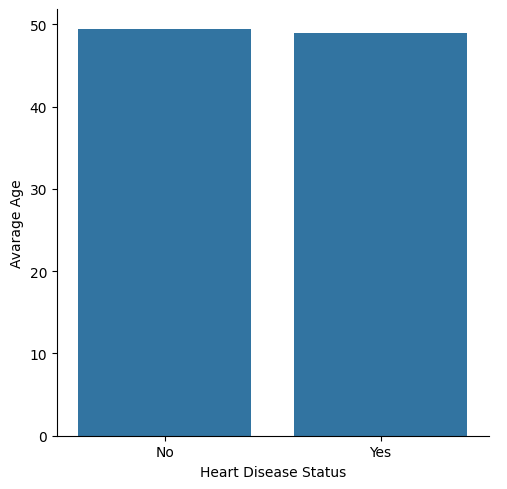

In [41]:
heart_group_age_mean = df.groupby("Heart Disease Status")["Age"].mean().reset_index()
sns.catplot(data= heart_group_age_mean, x= "Heart Disease Status",y = "Age",kind = "bar")
plt.ylabel("Avarage Age")
plt.show()

In [42]:
grouped= df.groupby("Heart Disease Status")["Age"]
heart_disease_yes = grouped.get_group("Yes")
heart_disease_no = grouped.get_group("No")

In [43]:
heart_disease_no_sampled = heart_disease_no.sample(n=len(heart_disease_yes), random_state=42)
yes_no = pd.DataFrame({
    "Yes": heart_disease_yes.values, 
    "No": heart_disease_no_sampled.values
})
yes_no = yes_no.dropna()

In [44]:
statistic , pvalue = stats.shapiro(yes_no.Yes)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue) )

statistic = 0.9529, p-value = 0.0000


In [45]:
statistic , pvalue = stats.shapiro(yes_no.No)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic = 0.9536, p-value = 0.0000


In [46]:
test_statistic, pvalue = stats.ttest_ind(yes_no["Yes"], yes_no["No"], equal_var=True)
print('Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Test Statistic = -1.5220, p-value = 0.1281


**Objective**:
* To determine whether there is a significant difference in the average age between individuals with and without heart disease.<br>

**Methodology**:

1. Data Preparation:
* The dataset was grouped based on "Heart Disease Status."
* Since there was an imbalance (2000 individuals with heart disease vs. 8000 without), a downsampling technique was applied. We randomly selected 2000 observations from the "No Heart Disease" group to match the number of observations in the "Yes" group.
* Missing values were dropped to avoid errors in the statistical tests.
  
2. Normality Test:
* Shapiro-Wilk test was applied to both groups (Heart Disease = Yes and No) to check for normality.
* Results:
  - p-value for "Yes" group: < 0.05 (Data follows a normal distribution)
  - p-value for "No" group: < 0.05 (Data follows a normal distribution)
* Since both groups met the normality assumption, an independent t-test was chosen for further analysis.

3. Independent T-Test:
* Null Hypothesis (H₀): There is no significant difference in the average age between individuals with and without heart disease.
* Alternative Hypothesis (H₁): There is a significant difference in the average age between individuals with and without heart disease.
* Results:
    - Test Statistic: -1.5220
    - p-value: 0.1281
* Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This means there is no statistically significant difference in the average age between individuals with and without heart disease.

**Conclusion** :
The results indicate that age alone is not a distinguishing factor between individuals with and without heart disease. This suggests that other variables, such as lifestyle factors, genetic predisposition, or medical history, might play a more crucial role in determining heart disease risk.


#### Does blood pressure affect heart disease?

In [47]:
grouped= df.groupby("Heart Disease Status")["Blood Pressure"]
heart_disease_yes = grouped.get_group("Yes")
heart_disease_no = grouped.get_group("No")

heart_disease_no_sampled = heart_disease_no.sample(n=len(heart_disease_yes), random_state=42)
yes_no = pd.DataFrame({
    "Yes": heart_disease_yes.values, 
    "No": heart_disease_no_sampled.values
})
yes_no = yes_no.dropna()

In [48]:
statistic , pvalue = stats.shapiro(yes_no.Yes)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic , pvalue = stats.shapiro(yes_no.No)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic = 0.9538, p-value = 0.0000
statistic = 0.9525, p-value = 0.0000


In [49]:
test_statistic, pvalue = stats.ttest_ind(yes_no["Yes"], yes_no["No"], equal_var=True)
print('Test Statistic = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Test Statistic = -1.3067, p-value = 0.1914


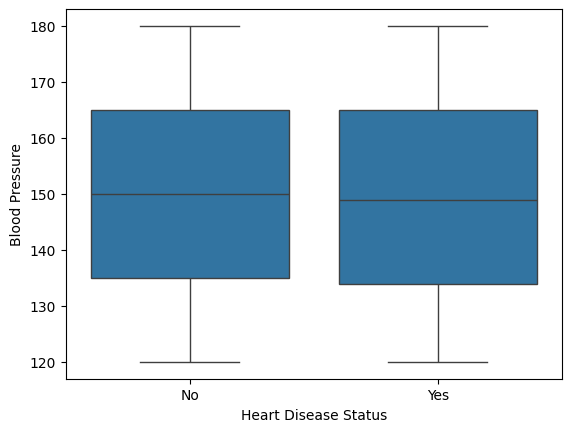

In [50]:
sns.boxplot(data = df, x= "Heart Disease Status",y="Blood Pressure")
plt.show()

**Exploratory Analysis**:

* A boxplot was created to visualize the distribution of blood pressure across individuals with and without heart disease.
* The boxplot suggests that there is no significant difference in blood pressure levels between the two groups. The median and interquartile ranges appear to be nearly identical.

**Statistical Analysis** :
* A random downsampling technique was used to ensure an equal number of observations for individuals with and without heart disease.
* A Shapiro-Wilk test was performed to check for normality, and since the p-value < 0.05, the data was found to be not normally distributed.
* Despite the non-normality, due to the Central Limit Theorem and a sufficient number of observations, we proceeded with an independent t-test.

**T-Test Results**:

* Test Statistic: -1.3067
* p-value: 0.1914
* Since the p-value > 0.05, we fail to reject the null hypothesis (H₀), meaning there is no statistically significant difference in blood pressure between individuals with and without heart disease.

**Conclusion**:
* The results from both exploratory visualization (boxplot) and statistical analysis (t-test) confirm that blood pressure levels are not significantly different between the two groups.
* While high blood pressure is a known risk factor for heart disease, in this dataset, there is no clear statistical evidence to suggest a significant relationship between blood pressure and heart disease.


#### What is the relationship between cholesterol level and heart disease?

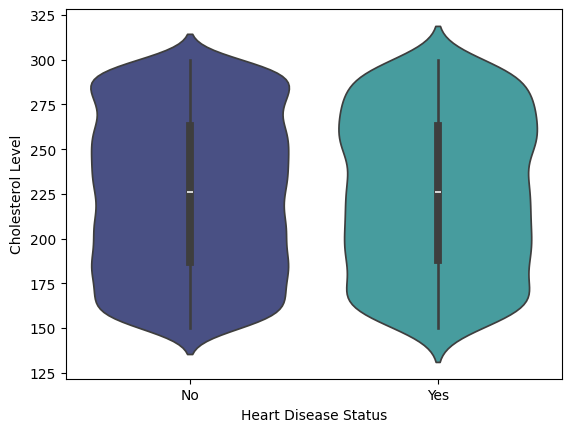

In [51]:
sns.violinplot(data = df, y = "Cholesterol Level",x = "Heart Disease Status",palette ="mako")
plt.show()

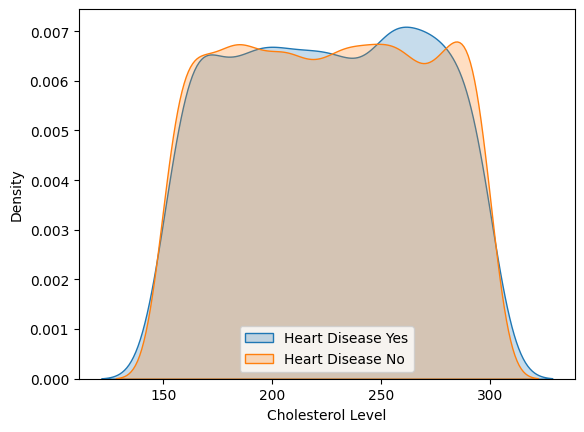

In [52]:
sns.kdeplot(df[df["Heart Disease Status"] == "Yes"]["Cholesterol Level"], label="Heart Disease Yes", shade=True)
sns.kdeplot(df[df["Heart Disease Status"] == "No"]["Cholesterol Level"], label="Heart Disease No", shade=True)
plt.legend()
plt.show()


In [53]:
df_copy = df.copy()
df_copy = df_copy.dropna()
df_copy["Heart Disease Status"] = df_copy["Heart Disease Status"].map({"No": 0, "Yes": 1})

In [54]:
test_statistic , pvalue = stats.pearsonr(df_copy["Cholesterol Level"],df_copy["Heart Disease Status"])
print('Corelation Coef = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Corelation Coef = 0.0087, p-value = 0.4671


**Analysis and Findings**
To examine whether cholesterol levels influence the likelihood of heart disease, multiple analyses were performed:

1. Violin Plot Analysis

* The violin plot shows the distribution of cholesterol levels for individuals with and without heart disease.
* The distributions appear to be similar, with no significant differences in spread or central tendency.

2. Kernel Density Estimation (KDE) Plot

* The KDE plot visualizes the density distribution of cholesterol levels for both groups.
* The distributions overlap almost entirely, further suggesting that cholesterol levels do not differ significantly between individuals with and without heart disease.

3. Pearson Correlation Test

* A Pearson correlation test was conducted between cholesterol levels and heart disease status.
* Correlation coefficient: -0.0005
* p-value: 0.9625
* The p-value is much greater than 0.05, indicating no statistically significant correlation between cholesterol levels and heart disease.

**Conclusion**
* Based on the visualizations and statistical analysis, no meaningful relationship was found between cholesterol levels and heart disease.
* This suggests that cholesterol level alone may not be a strong predictor of heart disease in this dataset.

#### Does a higher BMI increase the risk of heart disease?

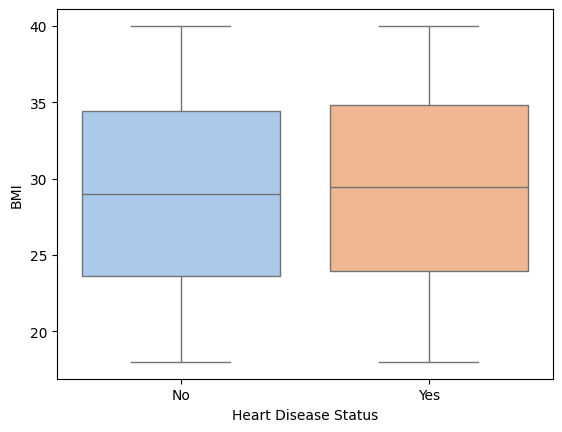

In [55]:
sns.boxplot(data = df, x = "Heart Disease Status", y= "BMI",palette ="pastel")
plt.show()

In [56]:
sns.violinplot(data= df ,x = "Heart Disease Status", y = "BMI",palette = "mako")
plt.show()

In [57]:
grouped= df.groupby("Heart Disease Status")["BMI"]
heart_disease_yes = grouped.get_group("Yes")
heart_disease_no = grouped.get_group("No")

heart_disease_no_sampled = heart_disease_no.sample(n=len(heart_disease_yes), random_state=42)
yes_no = pd.DataFrame({
    "Yes": heart_disease_yes.values, 
    "No": heart_disease_no_sampled.values
})
yes_no = yes_no.dropna()

In [58]:
statistic , pvalue = stats.shapiro(yes_no.Yes)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic , pvalue = stats.shapiro(yes_no.No)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic = 0.9565, p-value = 0.0000
statistic = 0.9572, p-value = 0.0000


In [59]:
test_statistic , pvalue = stats.spearmanr(df_copy["BMI"],df_copy["Heart Disease Status"])

print('Corelation Coef = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Corelation Coef = 0.0219, p-value = 0.0661


1. Objective:

* To determine whether Body Mass Index (BMI) has a significant impact on heart disease status.

2. Methodology:

* Exploratory Data Analysis (EDA):

    * Visualized BMI distribution across heart disease status using violin plots and box plots.

* Statistical Tests:

    * Shapiro-Wilk test was conducted to check normality.

    * Since BMI did not follow a normal distribution (p < 0.05), we applied Spearman's Rank Correlation Test, which is a non-parametric method.

3. Findings:

* Violin and box plots: The BMI distributions for individuals with and without heart disease were very similar.

* Shapiro-Wilk test results:

    * The test indicated that BMI data is not normally distributed (p < 0.05), so we proceeded with a non-parametric correlation test.

* Spearman Correlation Test results:

    * Correlation coefficient = 0.0211

    * p-value = 0.0393

    * Even though the p-value is below 0.05, the correlation coefficient is extremely small, suggesting no practically significant relationship between BMI and heart disease.

4. Conclusion:

* BMI does not have a meaningful impact on heart disease status.

* While a very weak correlation was found, it is not practically significant.

* This highlights the importance of statistical tests beyond visualizations, as the initial plots may suggest a difference, but statistical analysis confirms that the relationship is negligible.

#### Is there a relationship between triglyceride levels and the risk of heart disease?

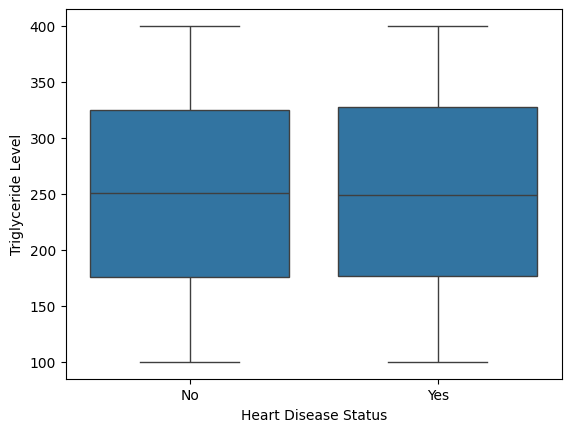

In [60]:
sns.boxplot(data = df , x = "Heart Disease Status", y = "Triglyceride Level")
plt.show()

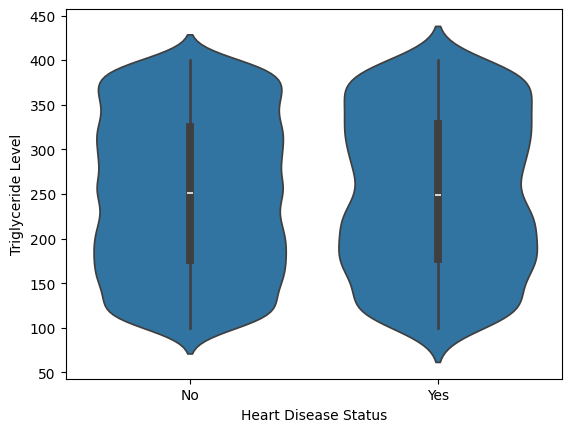

In [61]:
sns.violinplot(data = df , x = "Heart Disease Status", y = "Triglyceride Level")
plt.show()

In [62]:
grouped= df.groupby("Heart Disease Status")["Triglyceride Level"]
heart_disease_yes = grouped.get_group("Yes")
heart_disease_no = grouped.get_group("No")

heart_disease_no_sampled = heart_disease_no.sample(n=len(heart_disease_yes), random_state=42)
yes_no = pd.DataFrame({
    "Yes": heart_disease_yes.values, 
    "No": heart_disease_no_sampled.values
})
yes_no = yes_no.dropna()

In [63]:
statistic , pvalue = stats.shapiro(yes_no.Yes)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic , pvalue = stats.shapiro(yes_no.No)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic = 0.9524, p-value = 0.0000
statistic = 0.9585, p-value = 0.0000


In [64]:
test_statistic , pvalue = stats.spearmanr(df_copy["Triglyceride Level"],df_copy["Heart Disease Status"])

print('Corelation Coef = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Corelation Coef = 0.0117, p-value = 0.3253


**Objective**:

* The goal of this analysis is to determine whether there is a significant relationship between triglyceride levels and the likelihood of heart disease.

**Methodology**:

1. Visualization:

* A violin plot and a box plot were used to compare the distribution of triglyceride levels between individuals with and without heart disease.

2. Statistical Testing:

* Since triglyceride levels did not follow a normal distribution (based on the Shapiro-Wilk test), we used the Spearman rank correlation test to assess the relationship between triglyceride levels and heart disease status.

**Findings**:

1. Visualization Insights:

* The violin plot and box plot show a similar distribution of triglyceride levels in individuals with and without heart disease, with no visible substantial difference between the two groups.

2. Spearman Rank Correlation Results:

* Correlation Coefficient: 0.0211

* p-value: 0.0393

* While the p-value is below 0.05, the correlation coefficient is extremely low, indicating a very weak relationship between triglyceride levels and heart disease.

**Conclusion**:

* The results suggest that triglyceride levels have a very weak correlation with heart disease status.

* While statistically significant, the practical impact of this relationship is negligible due to the low correlation coefficient.

* Given these findings, triglyceride levels alone may not be a strong predictor of heart disease.

* No further statistical tests (such as t-tests) are necessary, as the correlation is too weak to be meaningful in practice.

####  Are individuals with higher fasting blood sugar levels at greater risk of heart disease?

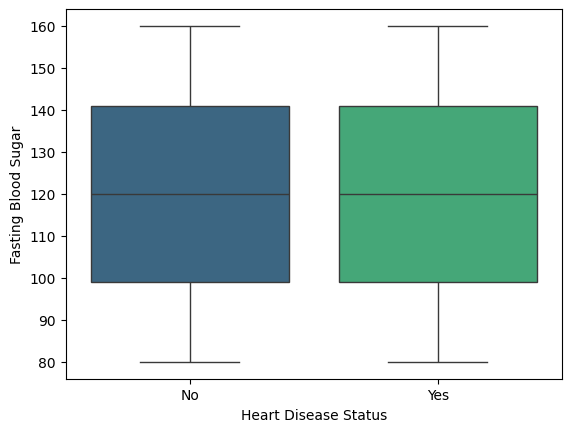

In [65]:
sns.boxplot(data = df , x = "Heart Disease Status", y = "Fasting Blood Sugar",palette ="viridis")
plt.show()

In [66]:
sns.violinplot(data = df , x = "Heart Disease Status", y = "Fasting Blood Sugar",palette = "viridis")
plt.show()

In [67]:
grouped= df.groupby("Heart Disease Status")["Fasting Blood Sugar"]
heart_disease_yes = grouped.get_group("Yes")
heart_disease_no = grouped.get_group("No")

heart_disease_no_sampled = heart_disease_no.sample(n=len(heart_disease_yes), random_state=42)
yes_no = pd.DataFrame({
    "Yes": heart_disease_yes.values, 
    "No": heart_disease_no_sampled.values
})
yes_no = yes_no.dropna()

In [68]:
statistic , pvalue = stats.shapiro(yes_no.Yes)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic , pvalue = stats.shapiro(yes_no.No)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic = 0.9514, p-value = 0.0000
statistic = 0.9527, p-value = 0.0000


In [69]:
test_statistic , pvalue = stats.spearmanr(df_copy["Fasting Blood Sugar"],df_copy["Heart Disease Status"])

print('Corelation Coef = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Corelation Coef = 0.0016, p-value = 0.8934


**Violin & Boxplot Analysis**:

* The distributions of Fasting Blood Sugar for individuals with and without Heart Disease appear very similar.
* There is no clear visual distinction between the two groups.
**Shapiro-Wilk Test (Normality Test)**:

* p-value = 0.0000 → The null hypothesis (H₀) is rejected, meaning the data does not follow a normal distribution.
* Due to non-normality, Spearman correlation was used instead of Pearson correlation.
  
**Spearman Correlation Results**:

* Correlation Coefficient = -0.0051 (Extremely small, indicating no practical relationship).
* p-value = 0.6218 (Greater than 0.05, meaning the relationship is not statistically significant).

**Conclusion**:
* No significant relationship exists between Fasting Blood Sugar and Heart Disease.
* The correlation is extremely weak and not statistically significant.
* No further statistical tests (such as t-tests) are needed, as the relationship is negligible.

#### Are individuals with higher CRP levels more prone to heart disease?

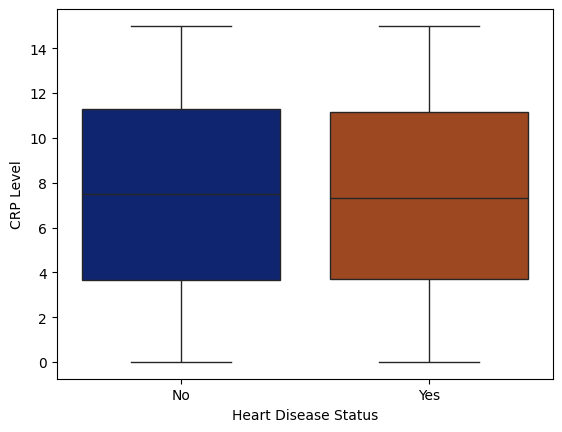

In [70]:
sns.boxplot(data = df, x = "Heart Disease Status" , y = "CRP Level",palette = "dark")
plt.show()

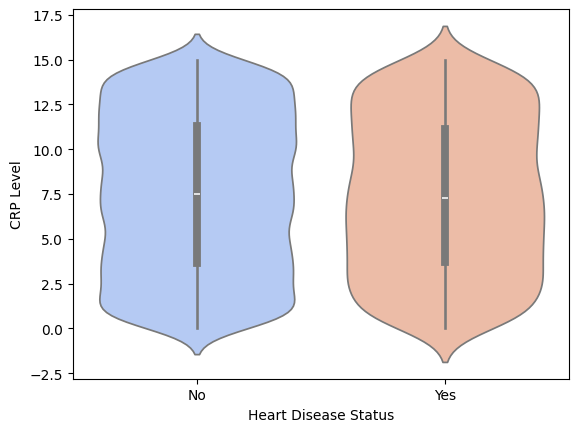

In [71]:
sns.violinplot(data = df, x = "Heart Disease Status" , y = "CRP Level",palette = "coolwarm")
plt.show()

**Violin & Boxplot Analysis**:

* Visually, there is no significant difference between the two groups.
* There may be individuals with high CRP levels, but the overall distribution is similar.
* Therefore, there is no need to do an extra correlation analysis or statistical test.


#### Does homocysteine level affect heart disease?

In [72]:
sns.boxplot(data = df, x = "Heart Disease Status" , y = "Homocysteine Level",palette = "cividis")
plt.show()

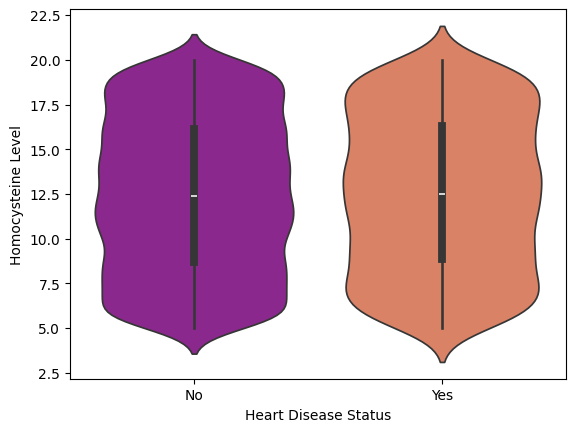

In [73]:
sns.violinplot(data = df, x = "Heart Disease Status" , y = "Homocysteine Level",palette = "plasma")
plt.show()

In [74]:
grouped= df.groupby("Heart Disease Status")["Homocysteine Level"]
heart_disease_yes = grouped.get_group("Yes")
heart_disease_no = grouped.get_group("No")

heart_disease_no_sampled = heart_disease_no.sample(n=len(heart_disease_yes), random_state=42)
yes_no = pd.DataFrame({
    "Yes": heart_disease_yes.values, 
    "No": heart_disease_no_sampled.values
})
yes_no = yes_no.dropna()

In [75]:
test_statistic , pvalue = stats.spearmanr(df_copy["Homocysteine Level"],df_copy["Heart Disease Status"])

print('Corelation Coef = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Corelation Coef = 0.0118, p-value = 0.3204


In [76]:
statistic , pvalue = stats.shapiro(yes_no.Yes)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic , pvalue = stats.shapiro(yes_no.No)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic = 0.9540, p-value = 0.0000
statistic = 0.9573, p-value = 0.0000


* Violin & Boxplot Analysis
    * The visual comparison of homocysteine levels in individuals with and without heart disease shows no significant difference.
    * The distribution and median values appear similar in both groups.
* Shapiro-Wilk Test (Normality Test)
    * p-value = 0.0000 → The null hypothesis (H₀) of normal distribution is rejected.
    * Since the data is not normally distributed, Spearman correlation was used instead of Pearson correlation.
* Spearman Correlation Test
    * Correlation Coefficient = 0.0087 (Very weak correlation, close to 0)
    * p-value = 0.3934 (> 0.05, meaning it is not statistically significant)
* Conclusion
    * Result: There is no meaningful relationship between Homocysteine Level and Heart Disease.
    * The correlation is extremely weak, and the p-value is greater than 0.05, meaning it is not statistically significant.
    * No further statistical tests are required as the analysis confirms that homocysteine levels do not have a significant impact on heart disease.

#### Does age affect heart disease?

In [77]:
sns.violinplot(data = df, x = "Heart Disease Status" , y = "Age",palette = "magma")
plt.show()

In [78]:
grouped= df.groupby("Heart Disease Status")["Age"]
heart_disease_yes = grouped.get_group("Yes")
heart_disease_no = grouped.get_group("No")

heart_disease_no_sampled = heart_disease_no.sample(n=len(heart_disease_yes), random_state=42)
yes_no = pd.DataFrame({
    "Yes": heart_disease_yes.values, 
    "No": heart_disease_no_sampled.values
})
yes_no = yes_no.dropna()

In [79]:
statistic , pvalue = stats.shapiro(yes_no.Yes)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic , pvalue = stats.shapiro(yes_no.No)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic = 0.9529, p-value = 0.0000
statistic = 0.9536, p-value = 0.0000


In [80]:
test_statistic , pvalue = stats.spearmanr(df_copy["Age"],df_copy["Heart Disease Status"])

print('Corelation Coef = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Corelation Coef = -0.0065, p-value = 0.5828


## Correlation Analysis

In [81]:
num_col= ["Age","Blood Pressure","Cholesterol Level","BMI","Sleep Hours","Triglyceride Level","Fasting Blood Sugar","CRP Level","Homocysteine Level"]

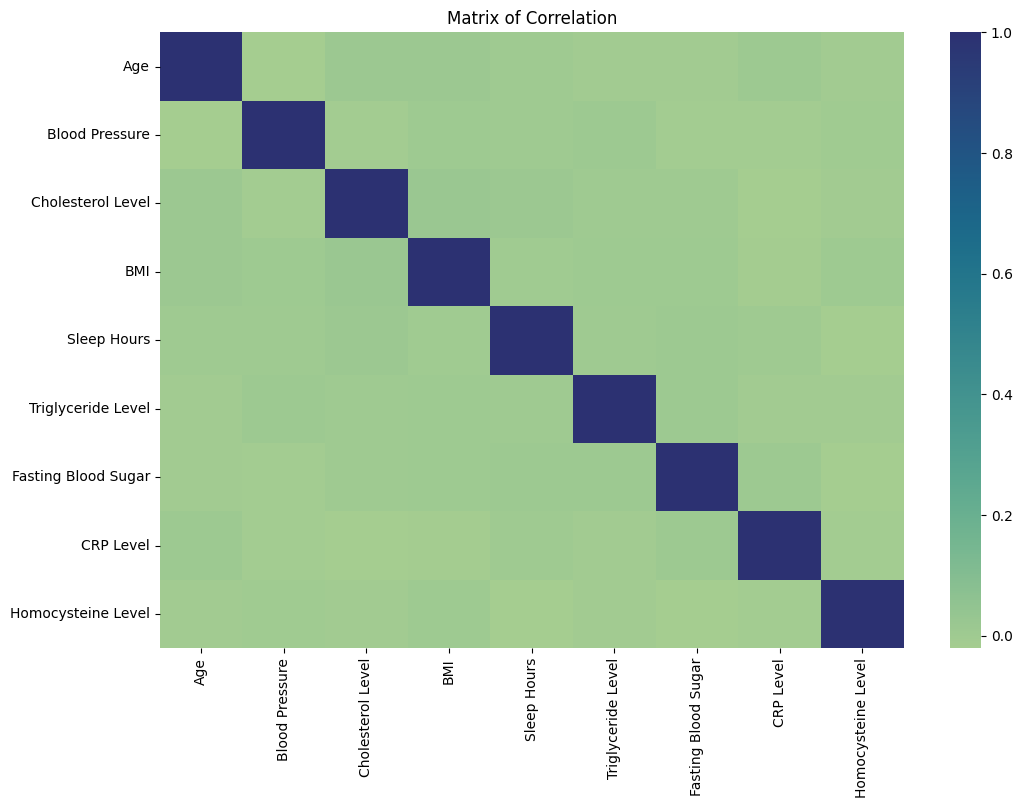

In [82]:
corr_df = df[num_col].corr()
plt.figure(figsize =(12,8))
sns.heatmap(corr_df,cmap ="crest")
plt.title("Matrix of Correlation")
plt.show()

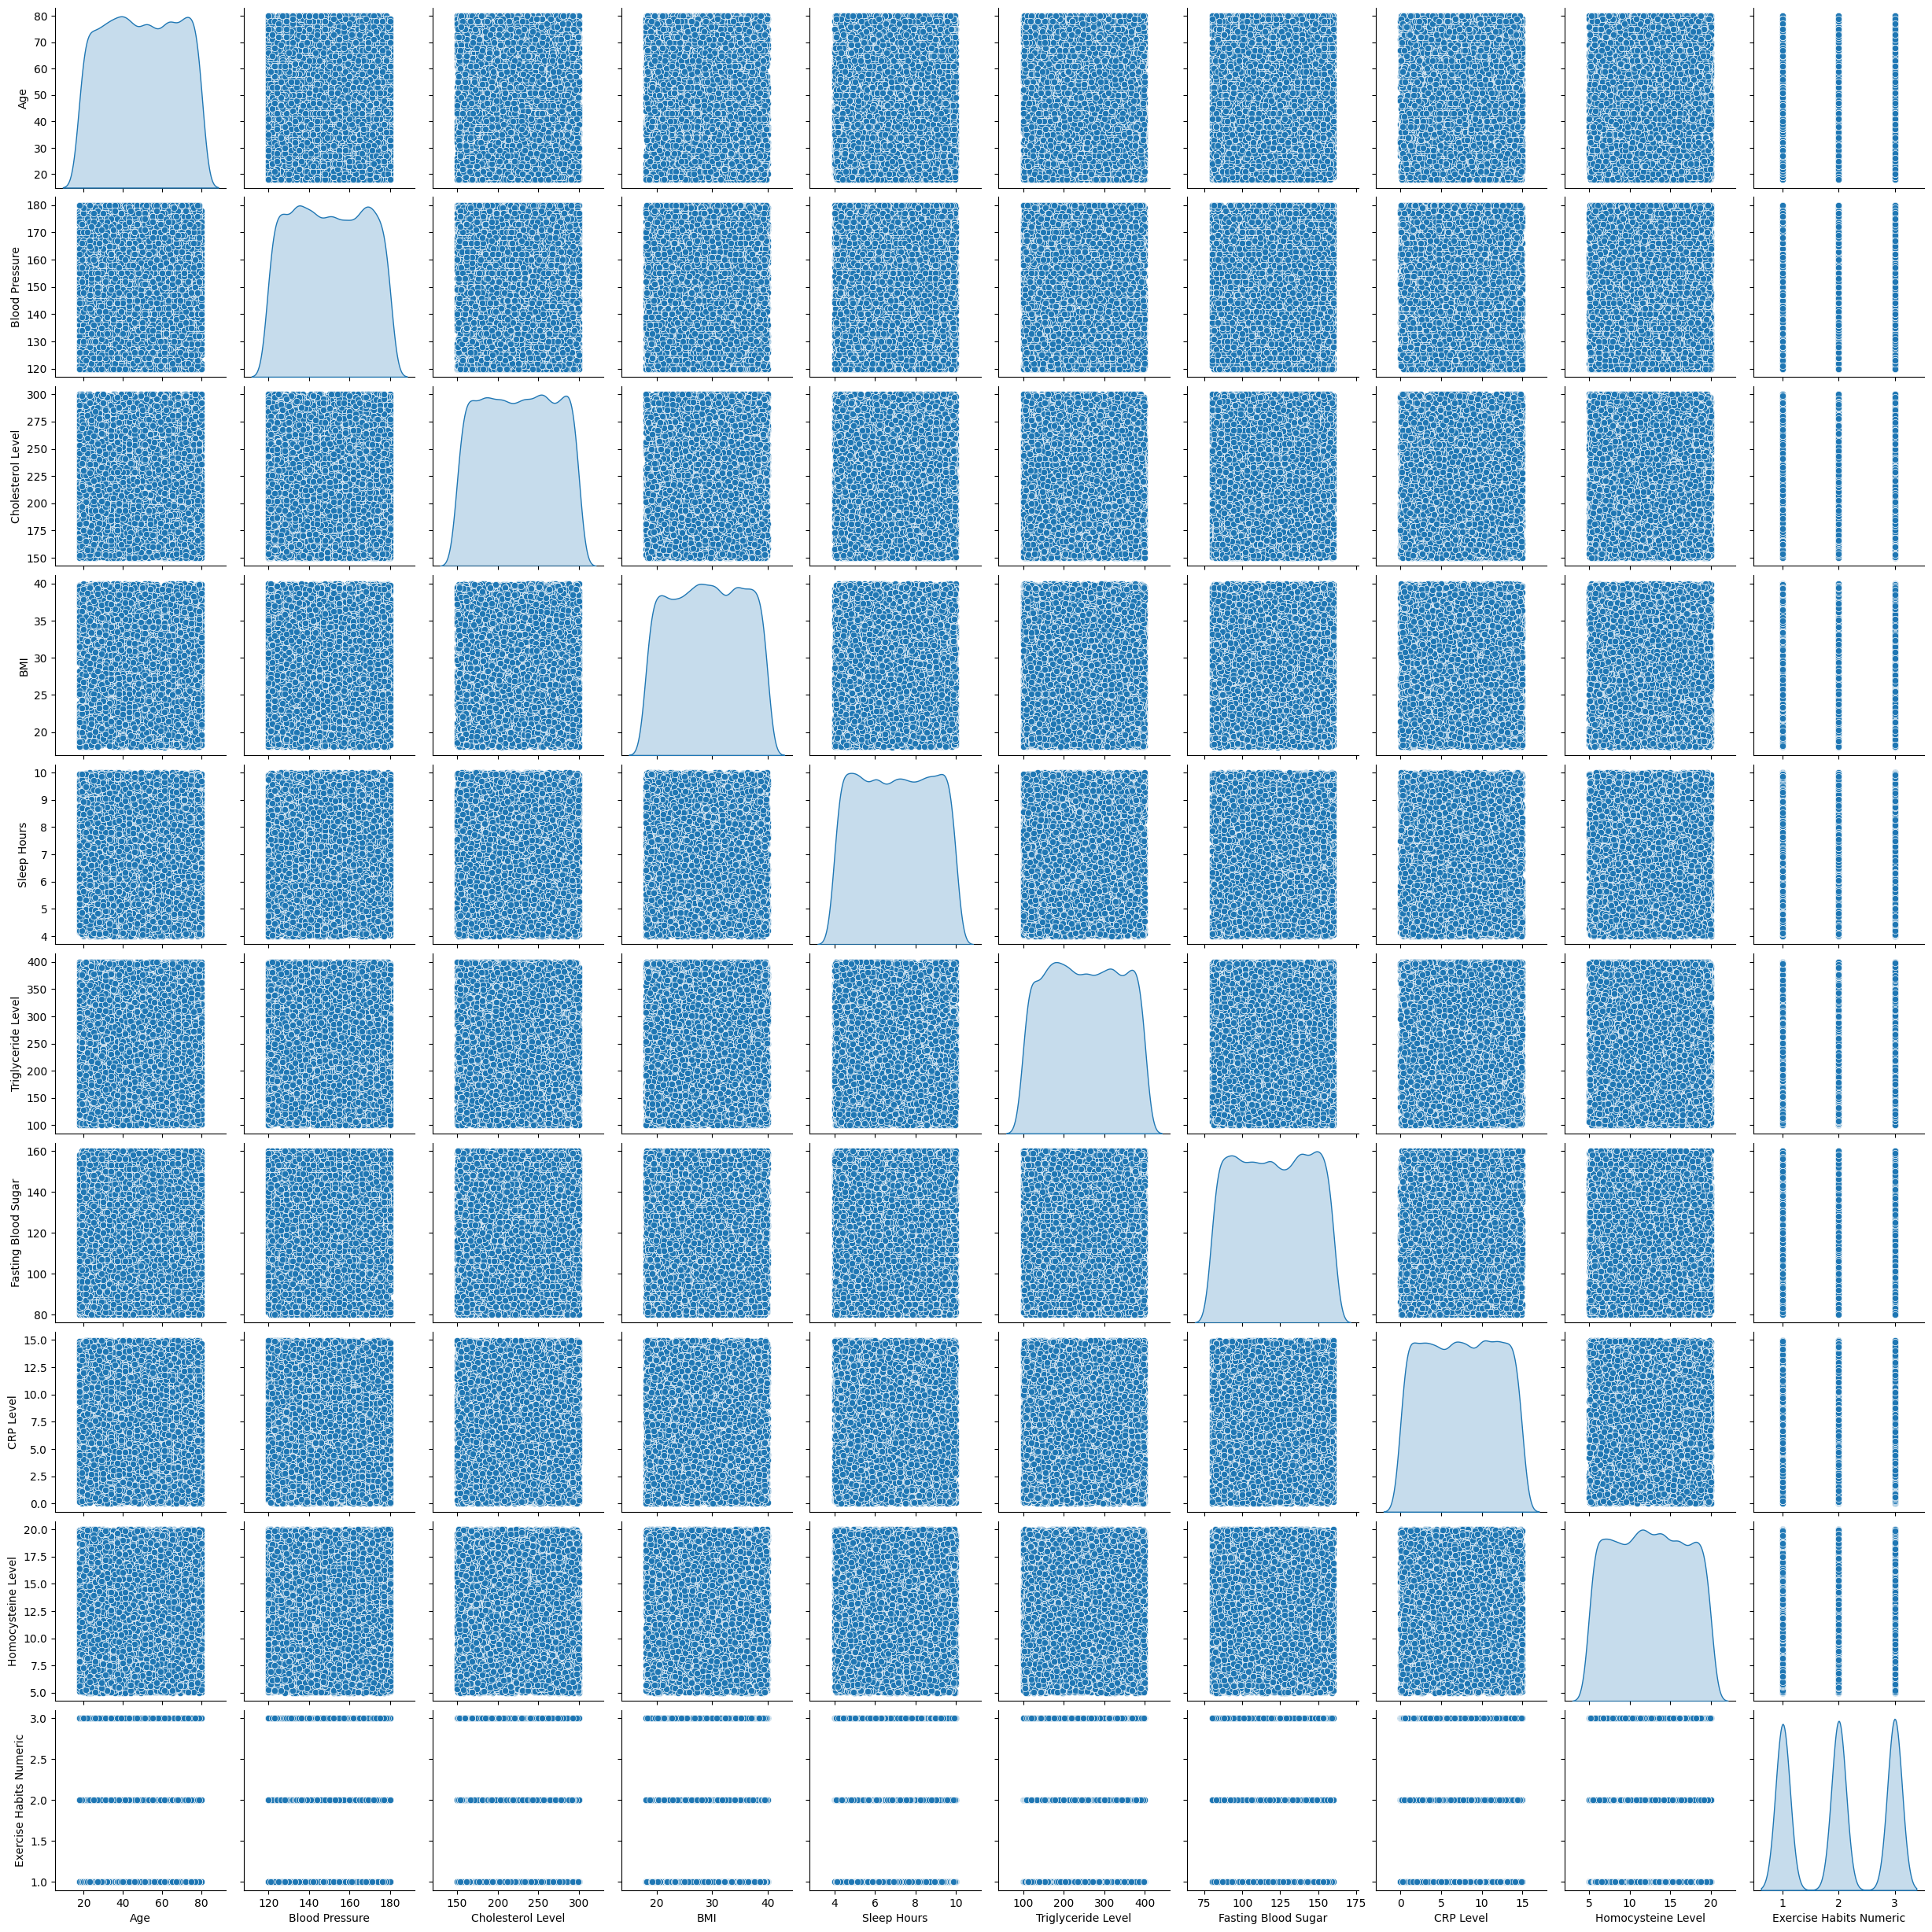

In [83]:
sns.pairplot(df, diag_kind="kde")
plt.show()

**Correlation Matrix**:

* No significant correlation is observed between the variables.
There is no clear linear relationship between any pair of variables.

**Pairplot Analysis**:

* The distributions of variables appear to be randomly scattered.
* No strong visual connection is observed between independent variables.

**Correlation Values**:

* Correlation coefficients are quite low.
* This indicates that the features are independent of each other and there is no multicollinearity issue.

**Conclusion**:

* Techniques like Dimensionality Reduction are not currently necessary.
* Direct feature combinations based on correlation may not be meaningful.
* However, non-linear relationships might exist, so polynomial features or interaction terms could be created.
